# Physics 248R - Section 3
## September 23, 2020

## Resolution of silicon strip and pixel detectors

In class, Masahiro discussed how silicon sensors work. There are discrete channels that ionization is collected onto, yielding discrete bins of hits when a charged particle passes through the sensor. If the strip center-to-center distance  is $d$, then the single-hit resolution is $\sigma = d/\sqrt{12}$.
<img src="img/Si-Sensor.png" width=350 height=350 />

This was explained in class, but I will show a different way to see this. Assuming the particle only fired a single strip or pixel, then the PDF describing the location of the particle track is given by $p(x) = 1/d$, let's say defined from $x=-d/2$ to $x=d/2$. Here's the sketch:
<img src="img/graph-sensor.png" width=350 height=350 />

The center of this distribution is clearly at $\bar{x}=0$, so that'd be our measured location. The resolution is defined by the RMS = $\sqrt{E\,[(x-\bar{x})^2]}$:

$$\sigma = \sqrt{\int_0^d f(x)(x-\bar{x})^2} = \sqrt{\frac{1}{d}\int_{-d/2}^{d/2}x^2\,dx} = \sqrt{\frac{1}{3d}\left.x^3\right|_{-d/2}^{d/2}} = \frac{d}{\sqrt{12}}$$

This applies for any quantized sensors that act as bins, including silicon strip/pixel sensors and calorimeter cells.

### ITk Strips

The ATLAS phase II upgrade includes a complete replacement of the inner tracking detector. Where there was once a combination of tracking technologies, there will now be only silicon pixel and silicon strip sensors. Near the vertex there will be pixels to cope with the high occupancy and acheive better vertex resolution. In the outer layers, there will be strip detectors. In the barrel region, the strip sensors are mounted onto ~meter long carbonfiber staves that supply liquid cooling and power to 14 sensors on either side of the stave. Here's a picture:
<img src="img/stave.png" width=500 height=500 />

The silicon modules themselves have a strip pitch (spacing between strips) of about 75 $\mu$m, combined with a strip width of about 25 $\mu$m means that the "bin width" for hits is about 100 $\mu$m. The modules are about 10cmx10cm and some rows of strips extend the entire length. The strips are oriented long-ways along the beam axis, meaning that each strip has a single-hit resolution of 29 $\mu$m in the transverse plane and 2.9 cm along the beam axis. Clearly this is quite bad. But, since each stave has a module on either side, we can rotate the modules so that the strips are slightly non-parallel, which will buy better resolution along the beam axis. 

In the same way that having two ears allows a sound's source to be identified, affixing modules with a relative rotated at a so-called stereo angle allows hits to be better located. We can determine exactly the effect of this. Let's parameterize the edges of the intersecting strips:

<img src="img/stereo.png" width=500 height=500 />

If we have a hit on these two strips, then the uniform distribution over the area of intersection with a value of $1/A$ defines the PDF for the location of the particle, where $A$ is the area of this trapezoidal shape:

$$A = \int_0^d\int_{x\cot\theta-d\csc\theta}^{x\cot\theta}dy\,dx = d^2\csc\theta$$

It's worth noting that this only holds if the stereo angle is not so small that the strips overlap all the way to the sensor edges. The next thing we can do is compute the center of the hit along the $y$-axis:

$$\bar{y} = \frac{1}{A}\int_0^d\int_{y_1}^{y_2}ydy\,dx = \frac{1}{d^2\csc\theta}\int_0^d\int_{x\cot\theta-d\csc\theta}^{x\cot\theta}ydy\,dx = \frac{d}{2}\left(\frac{1}{2}\cot\theta - \csc\theta\right)$$

As a check, we can ask what happens when $\theta = \pi/2$, the case where the strips are perpendicular. The overlap region is the same as a square pixel, so the mean should be $-d/2$ in our coordinate system - and it indeed is. So far so good. The last step is determining the resolution along the $y$-axis.

$$\sigma_y = \sqrt{\int_0^d\int_{y_1}^{y_2}f(x,y)(y-\bar{y})^2 dy\,dx} = \sqrt{\frac{1}{d^2\csc\theta}\int_0^d\int_{x\cot\theta-d\csc\theta}^{x\cot\theta}\left[y-\frac{d}{2}\left(\frac{1}{2}\cot\theta - \csc\theta\right)\right]^2 dy\,dx} = d\sqrt{\frac{4\csc^2\theta+7\cot^2\theta}{48}}$$

The math itself isn't interesting, you can use Mathematica to do the integral or do it by hand if you want to kill time. Again, let's check to make sure it reduces to the right answer when $\theta = \pi/2$. The cotangent term vanishes, and the 4 cancels the 48, leaving us with $d/\sqrt{12}$, as expected. 

The actual stereo angle for the ITk modules is 40 milliradians, so the stereo resolution is 1.2 mm, better by a factor of 300 along the beam axis over the single-strip resolution. 

In [29]:
import numpy as np
def res_y(theta):
    return np.sqrt((4/np.sin(theta)**2 + 7/np.tan(theta)**2)/48)
print(100*res_y(0.040))

1196.4938222693677


Just for fun, we can see how the resolution improves as a function of the stero angle. Let's plot the ratio of $\sigma_y/d$:

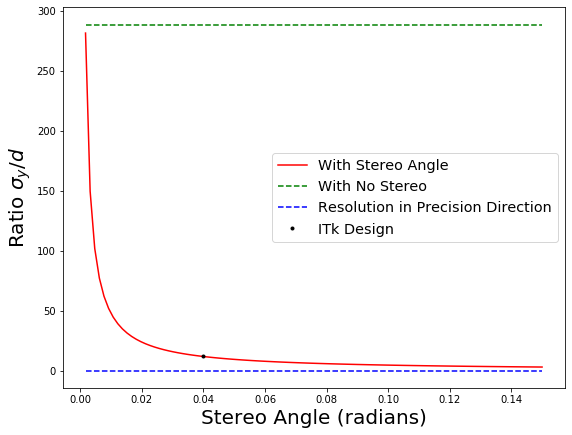

In [42]:
import matplotlib.pyplot as plt
theta = np.linspace(0.0017,0.15,100)
res = res_y(theta)
fig = plt.figure(figsize=(9,7))
plt.plot(theta,res,'-r',label='With Stereo Angle')
plt.plot(theta,np.ones(len(theta))*1e3/np.sqrt(12),'--g',label='With No Stereo')
plt.plot(theta,np.ones(len(theta))/np.sqrt(12),'--b',label='Resolution in Precision Direction')
plt.plot([.04],[res_y(0.04)],'.k',label='ITk Design')
plt.xlabel('Stereo Angle (radians)',fontsize=20)
plt.ylabel(r'Ratio $\sigma_y/d$',fontsize=20)
plt.legend(fontsize='x-large')
plt.show()

From this, it can be seen that choosing an angle as moderate as 40 milliradians gets us most of the way from the initial poor resolution to the maximum resolution obtained from a 90-degree rotation. Keep in mind that a large stereo angle is ruled-out from a design perspective, since each channel needs to be read out and HV needs to be supplied to the module. But a shallow angle is acceptable, and in the end all that is required.

Those familiar with the Micromegas stereo layers should also be familiar with this concept. 

### Stereo Readout in LArTPC

The class of liquid-argon time-projection chambers, including MicroBooNE, SBND, and DUNE, rely on a similar strategy for obtaining precise 2D spatial information from redundant 1D channels at a stereo angle. Here is a schematic of how these detectors work:
<img src="img/lartpc.png" width=700 height=700 />
Here, there are 3 parallel planes of copper wires oriented at $\pm$60 degrees relative to the central plane. There are 3 layers to provide redundancy in the event that channels die in the cryogenic volume after commissioning. 

Clearly, the strategy of using 1D channels at relative angles to obtain good 2D spatial information is ubiquitous in particle physics. It is suitable for situations where hit rates are not too overwhelming for 1D strip/wire channels and the utmost precision is not required. It reduces costs and the amount of channels, which each need to be supplied with HV and cooled. It should be noted that it is not trivial to do the 2D reconstruction using strips/wires. In the case of LArTPC, the finite time resolution complicates reconstruction of tracks that form parallel to the wire readout plane.